In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
#Reading the data
pima = pd.read_csv("pima.csv")
pima.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [5]:
#defining column names
column = ['pregnant','glucose','bp','skin','insulin_level','bmi','pedigree','age','diabetes_label']

In [7]:
#Adding column names
data = pd.read_csv("pima.csv",names=column)
data.head()

,pregnant,glucose,bp,skin,insulin_level,bmi,pedigree,age,diabetes_label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#getting the no. of rows and columns
data.shape

(768, 9)

In [9]:
#to get the aggregate of the data
data.describe()

,pregnant,glucose,bp,skin,insulin_level,bmi,pedigree,age,diabetes_label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
#checking for null values
data.isna().sum()

pregnant          0
glucose           0
bp                0
skin              0
insulin_level     0
bmi               0
pedigree          0
age               0
diabetes_label    0
dtype: int64

In [11]:
#general information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pregnant        768 non-null    int64  
 1   glucose         768 non-null    int64  
 2   bp              768 non-null    int64  
 3   skin            768 non-null    int64  
 4   insulin_level   768 non-null    int64  
 5   bmi             768 non-null    float64
 6   pedigree        768 non-null    float64
 7   age             768 non-null    int64  
 8   diabetes_label  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
#get the number of diabetic personel
data['diabetes_label'].value_counts()

0    500
1    268
Name: diabetes_label, dtype: int64

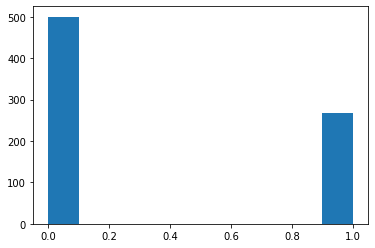

In [13]:
#visualize the diabetes label
plt.hist(data['diabetes_label'])
plt.show()

# Model builiding

In [17]:
import  tensorflow as tf
import keras

In [15]:
features = data.drop('diabetes_label',axis=1)
features.head()

,pregnant,glucose,bp,skin,insulin_level,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [51]:
X = features
y = data["diabetes_label"]
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [21]:
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras.optimizers import RMSprop,SGD

In [68]:
def model_creation():    
    model = Sequential()
    model.add(Dense(32,input_dim=8,kernel_initializer="normal",activation="relu"))
    model.add(Dense(16,kernel_initializer="normal",activation="relu"))
    model.add(Dense(1,kernel_initializer="normal",activation="sigmoid"))

    model.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=['accuracy'])
    
    return model

In [69]:
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier

In [70]:
estimator = KerasClassifier(build_fn=model_creation,nb_epoch=100,verbose=0)

In [71]:
scores = cross_val_score(estimator,X,y,cv=10)
print(scores.mean())

0.6431647326081726
